In [1]:
import json
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("./kaggle_dataset/competition/train.json", "r") as f:
    train = json.load(f)

len(train)

6807

In [3]:
df = pd.read_json("./kaggle_dataset/competition/train.json")
id2label = {
    0: "B-EMAIL",
    1: "B-ID_NUM",
    2: "B-NAME_STUDENT",
    3: "B-PHONE_NUM",
    4: "B-STREET_ADDRESS",
    5: "B-URL_PERSONAL",
    6: "B-USERNAME",
    7: "I-ID_NUM",
    8: "I-NAME_STUDENT",
    9: "I-PHONE_NUM",
    10: "I-STREET_ADDRESS",
    11: "I-URL_PERSONAL",
    12: "O"
}


def df_filter(q):
    tmp = df[df["labels"].apply(lambda x: True if x.count(q) > 0 else False)]
    for idx, row in tmp.iterrows():
        for i, (t, l) in enumerate(zip(row.tokens, row.labels)):
            st = i
            while st > 0 and row.labels[st] != "O":
                st -= 1
            ed = i
            while ed < len(row.tokens) and row.labels[ed] != "O":
                ed += 1
            if l == q:
                print(" ".join(row.tokens[st + 1:ed]))
                print(row.tokens[st + 1:ed])
                print(row.labels[st + 1:ed])
        print("--" * 20)


df_filter("B-USERNAME")

castanedagabriel
['castanedagabriel']
['B-USERNAME']
----------------------------------------
fdixon
['fdixon']
['B-USERNAME']
fdixon
['fdixon']
['B-USERNAME']
----------------------------------------
meyermichelle
['meyermichelle']
['B-USERNAME']
----------------------------------------
jacob59
['jacob59']
['B-USERNAME']
----------------------------------------
holmespatrick
['holmespatrick']
['B-USERNAME']
----------------------------------------


In [4]:
lengths = []

for i in tqdm(range(len(train)), total=len(train)):
    text = train[i]["full_text"]
    length = len(text.split(" "))
    lengths.append(length)

print(np.mean(lengths))

100%|██████████| 6807/6807 [00:00<00:00, 7201.29it/s] 

635.3486117232261


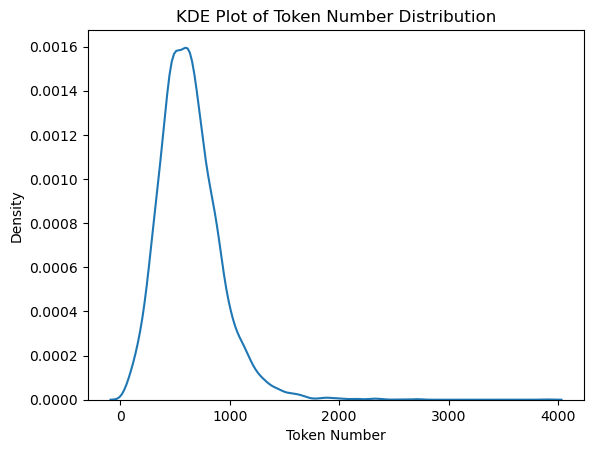

In [5]:
sns.kdeplot(lengths)
plt.xlabel("Token Number")
plt.ylabel("Density")
plt.title("KDE Plot of Token Number Distribution")
plt.show()

In [6]:
df.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


100%|██████████| 6807/6807 [00:01<00:00, 6360.35it/s]


1374


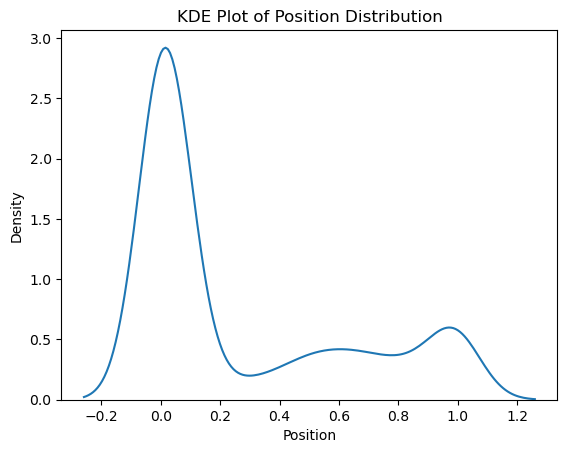

In [7]:
position_percentage = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    labels = row["labels"]
    length = len(labels)
    for index, label in enumerate(labels):
        if label != "O" and label != "B-NAME_STUDENT" and label != "I_NAME_STUDENT":
            position_percentage.append((index + 1) * 1.0 / length)

print(len(position_percentage))

sns.kdeplot(position_percentage)
plt.xlabel("Position")
plt.ylabel("Density")
plt.title("KDE Plot of Position Distribution")
plt.show()